In [1]:
# This R environment comes with many helpful analytics packages installed


In [2]:
library(DAAG)
library(MASS)
library(dplyr)
library(ggplot2)
library(ggExtra)
library(corrplot)
library(psych)


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
#data
data('possum')
str(possum)
summary(possum)

'data.frame':	104 obs. of  14 variables:
 $ case    : num  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Pop     : Factor w/ 2 levels "Vic","other": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex     : Factor w/ 2 levels "f","m": 2 1 1 1 1 1 2 1 1 1 ...
 $ age     : num  8 6 6 6 2 1 2 6 9 6 ...
 $ hdlngth : num  94.1 92.5 94 93.2 91.5 93.1 95.3 94.8 93.4 91.8 ...
 $ skullw  : num  60.4 57.6 60 57.1 56.3 54.8 58.2 57.6 56.3 58 ...
 $ totlngth: num  89 91.5 95.5 92 85.5 90.5 89.5 91 91.5 89.5 ...
 $ taill   : num  36 36.5 39 38 36 35.5 36 37 37 37.5 ...
 $ footlgth: num  74.5 72.5 75.4 76.1 71 73.2 71.5 72.7 72.4 70.9 ...
 $ earconch: num  54.5 51.2 51.9 52.2 53.2 53.6 52 53.9 52.9 53.4 ...
 $ eye     : num  15.2 16 15.5 15.2 15.1 14.2 14.2 14.5 15.5 14.4 ...
 $ chest   : num  28 28.5 30 28 28.5 30 30 29 28 27.5 ...
 $ belly   : num  36 33 34 34 33 32 34.5 34 33 32 ...


      case             site          Pop     sex         age       
 Min.   :  1.00   Min.   :1.000   Vic  :46   f:43   Min.   :1.000  
 1st Qu.: 26.75   1st Qu.:1.000   other:58   m:61   1st Qu.:2.250  
 Median : 52.50   Median :3.000                     Median :3.000  
 Mean   : 52.50   Mean   :3.625                     Mean   :3.833  
 3rd Qu.: 78.25   3rd Qu.:6.000                     3rd Qu.:5.000  
 Max.   :104.00   Max.   :7.000                     Max.   :9.000  
                                                    NA's   :2      
    hdlngth           skullw         totlngth         taill      
 Min.   : 82.50   Min.   :50.00   Min.   :75.00   Min.   :32.00  
 1st Qu.: 90.67   1st Qu.:54.98   1st Qu.:84.00   1st Qu.:35.88  
 Median : 92.80   Median :56.35   Median :88.00   Median :37.00  
 Mean   : 92.60   Mean   :56.88   Mean   :87.09   Mean   :37.01  
 3rd Qu.: 94.72   3rd Qu.:58.10   3rd Qu.:90.00   3rd Qu.:38.00  
 Max.   :103.10   Max.   :68.60   Max.   :96.50   Max.   :43

In [4]:
#select
possum%>% select(1:3,9,10:13) # toselect specific column


,case,site,Pop,taill,footlgth,earconch,eye,chest
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3,1,1,Vic,36.0,74.5,54.5,15.2,28.0
C5,2,1,Vic,36.5,72.5,51.2,16.0,28.5
C10,3,1,Vic,39.0,75.4,51.9,15.5,30.0
C15,4,1,Vic,38.0,76.1,52.2,15.2,28.0
C23,5,1,Vic,36.0,71.0,53.2,15.1,28.5
C24,6,1,Vic,35.5,73.2,53.6,14.2,30.0
C26,7,1,Vic,36.0,71.5,52.0,14.2,30.0
C27,8,1,Vic,37.0,72.7,53.9,14.5,29.0
C28,9,1,Vic,37.0,72.4,52.9,15.5,28.0


In [5]:
#select
data<-possum%>% select(1:3,9,10:13) # toselect specific column and making own data

In [6]:
#Filter
possum %>% filter(sex == 'f')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C5,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
C10,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
C15,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
C23,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
C24,6,1,Vic,f,1,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
C27,8,1,Vic,f,6,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
C28,9,1,Vic,f,9,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
C31,10,1,Vic,f,6,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0
C32,11,1,Vic,f,9,93.3,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0


In [7]:
#Arrange
possum %>%filter(sex == 'f')%>%
arrange(desc(belly))

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C54,21,1,Vic,f,3,95.9,58.1,96.5,39.5,77.9,52.9,14.2,30.0,40.0
BR4,57,4,other,f,4,95.1,59.4,93.0,41.0,67.2,45.3,14.5,31.0,39.0
WW5,51,3,other,f,5,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5
CD5,65,5,other,f,5,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5
C50,20,1,Vic,f,4,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0
WW4,50,3,other,f,5,91.6,56.4,88.0,38.0,65.0,47.2,14.9,28.0,36.0
C58,23,1,Vic,f,4,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0
BTP15,99,7,other,f,3,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
C10,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [8]:
#Summarize
possum %>%filter(sex == 'f')%>%
summarize(Avg=mean(belly)) 

Avg
<dbl>
32.88372


In [9]:
#Summarize
possum %>%filter(sex == 'f')%>%
summarize(Avg=mean(belly),
          count=n(),
         s=sd(belly))  # sd stands for standard deviation

Avg,count,s
<dbl>,<int>,<dbl>
32.88372,43,2.929402


In [10]:
#Group by
possum %>%filter(sex == 'f')%>%
group_by(site) %>%
summarize(Avg=mean(belly),
          count=n(),
         s=sd(belly)) 

site,Avg,count,s
<dbl>,<dbl>,<int>,<dbl>
1,33.31579,19,2.334586
2,29.60000,5,2.631539
3,36.00000,3,2.500000
4,34.50000,2,6.363961
5,33.33333,6,3.250641
6,31.50000,4,2.081666
7,32.50000,4,2.198484


In [11]:
#Group by
possum %>%filter(sex == 'f')%>%
group_by(site) %>%
summarize(Avg=mean(belly),
          count=n(),
         s=sd(belly))%>%
arrange(desc(s)) 

site,Avg,count,s
<dbl>,<dbl>,<int>,<dbl>
4,34.50000,2,6.363961
5,33.33333,6,3.250641
2,29.60000,5,2.631539
3,36.00000,3,2.500000
1,33.31579,19,2.334586
7,32.50000,4,2.198484
6,31.50000,4,2.081666


In [12]:
#Mutate
possum %>%
group_by(site) %>%
summarize(TR = sum(taill)/sum(totlngth),
         count=n()) %>%
arrange(desc(TR)) 

site,TR,count
<dbl>,<dbl>,<int>
6,0.4454049,13
7,0.4398703,18
5,0.4331858,13
4,0.4305405,7
2,0.4256820,13
3,0.4225466,7
1,0.4055058,33


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


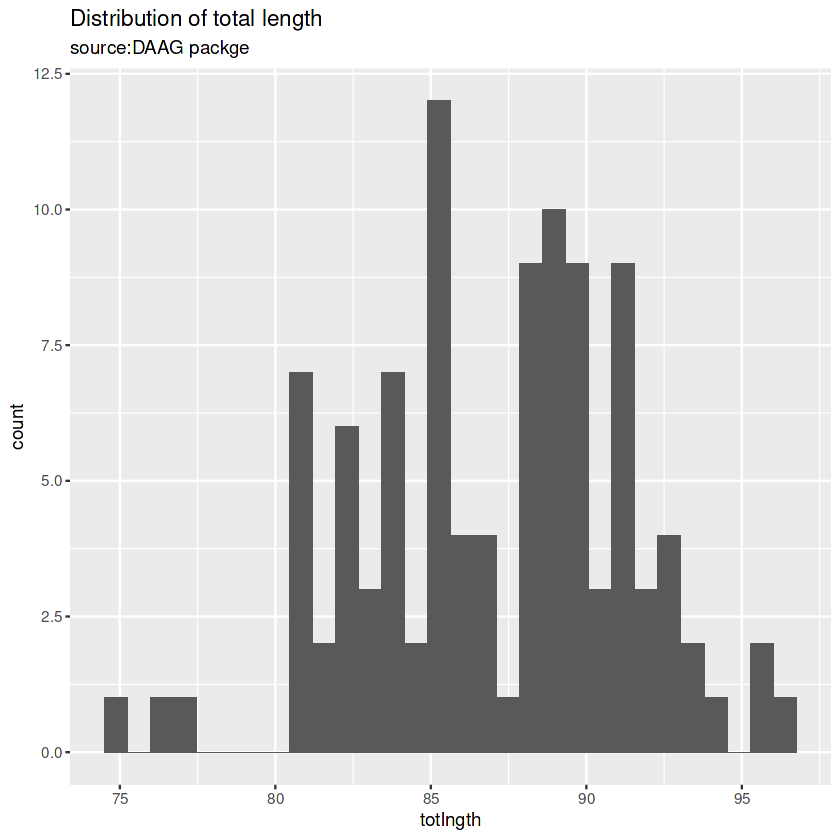

In [13]:
#Histogram
possum %>% ggplot(aes(x=totlngth)) +
geom_histogram()+
ggtitle('Distribution of total length','source:DAAG packge')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


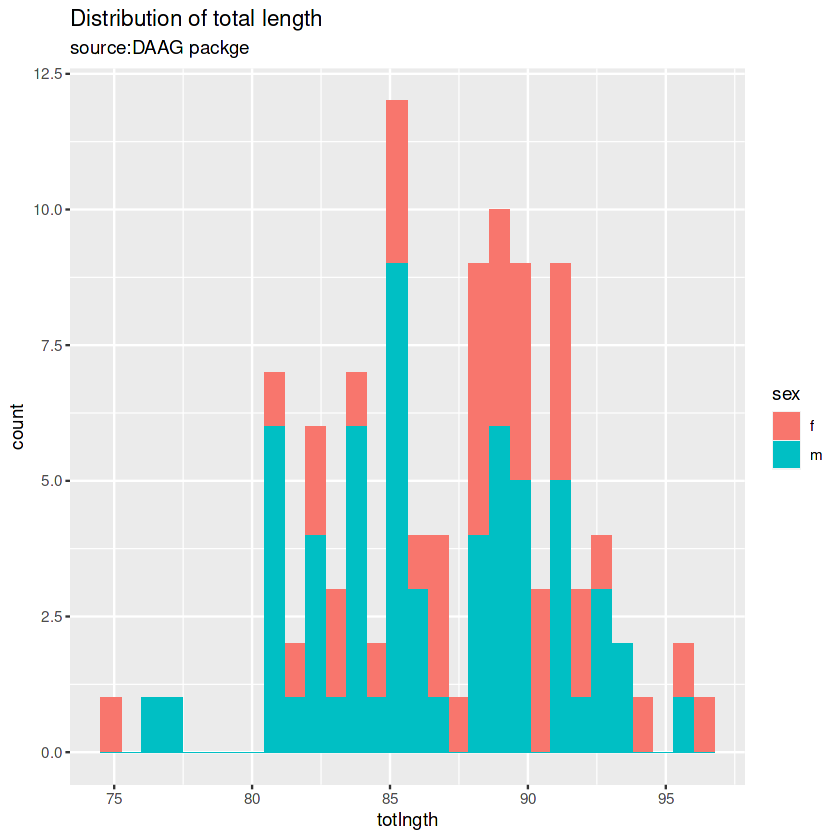

In [14]:
#Histogram + fill
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram()+
ggtitle('Distribution of total length','source:DAAG packge')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


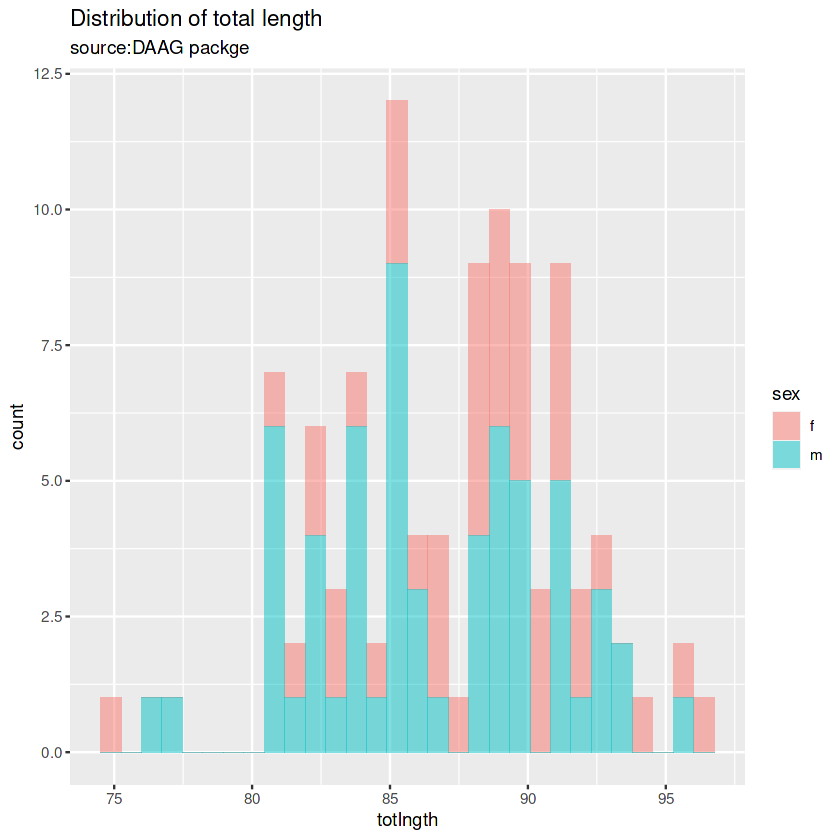

In [15]:
#Histogram + fill + aplha
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


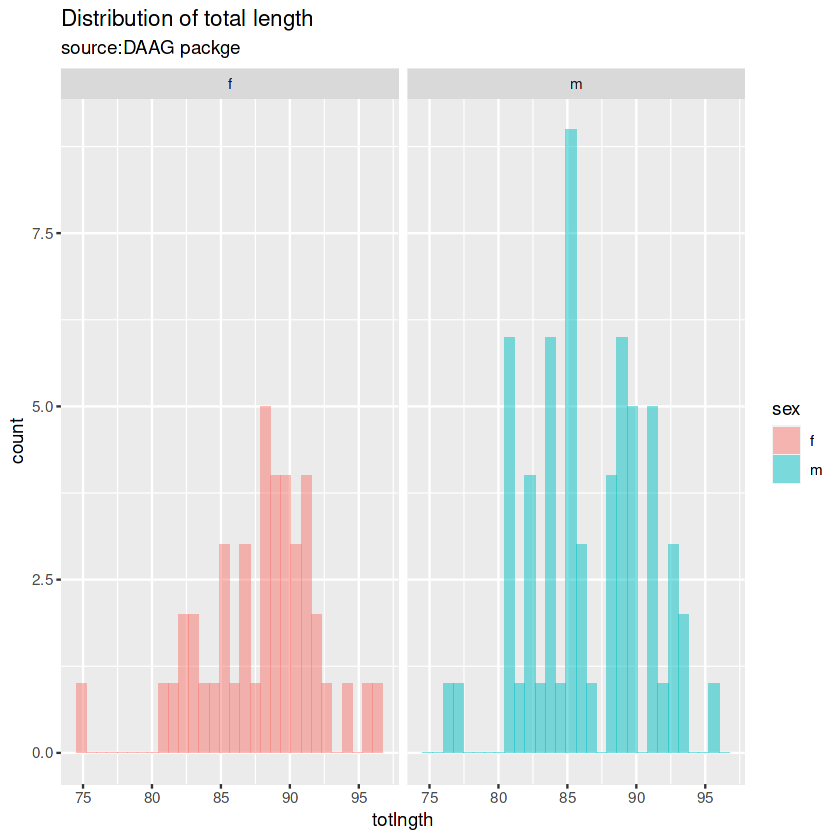

In [16]:
#Histogram + fill + aplha + facet_wrap
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_wrap(~ sex)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


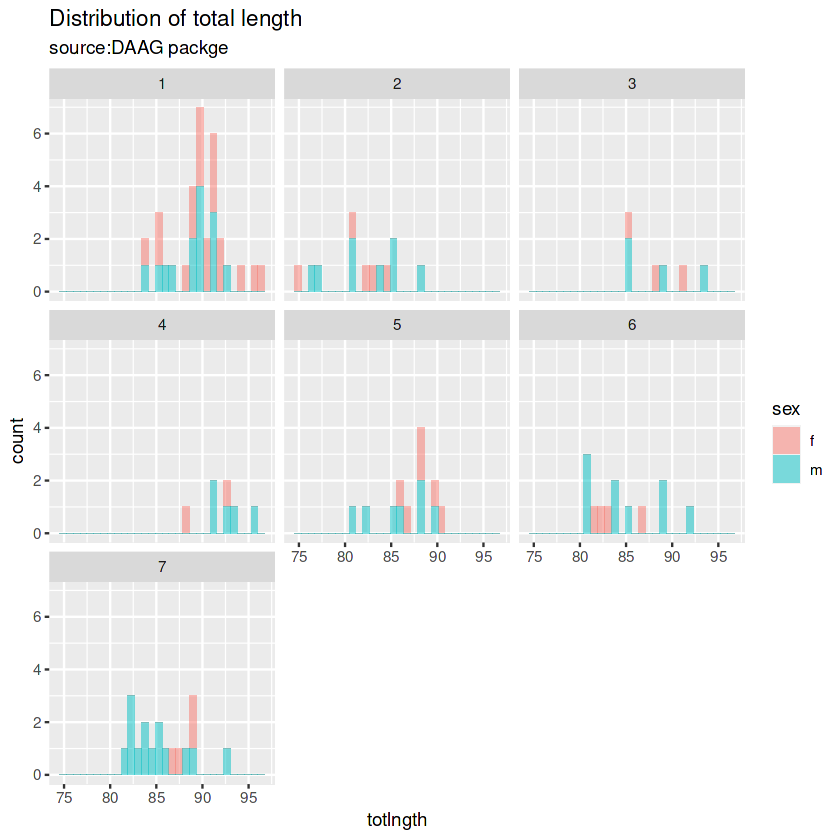

In [17]:
#Histogram + fill + alpha + facet_wrap(site)
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_wrap(~ site)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

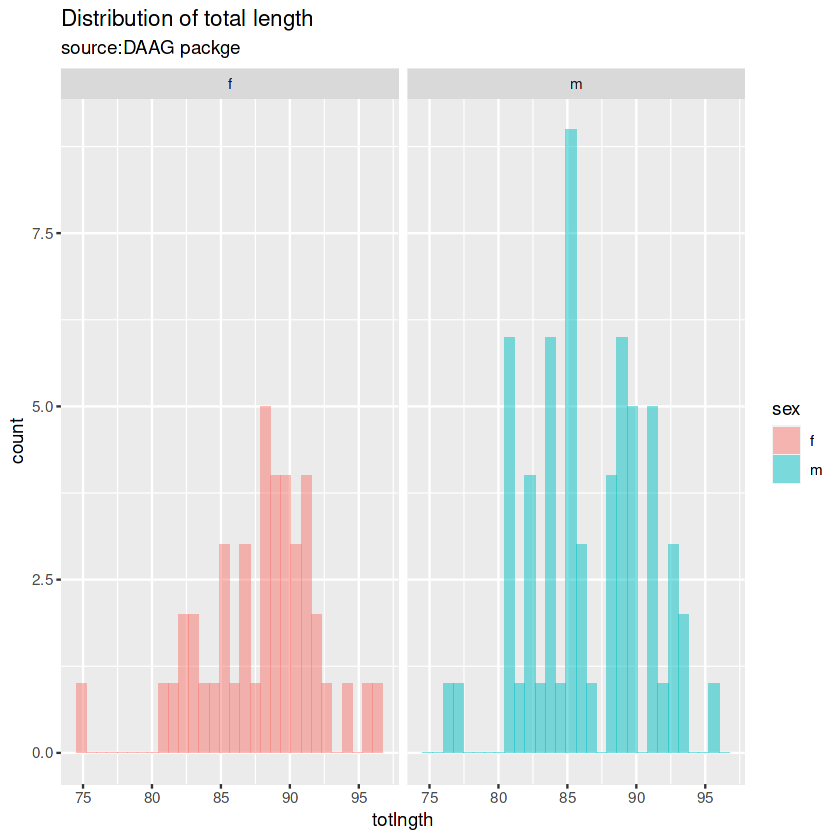

In [18]:
#Histogram + theme_bw
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_wrap(~ sex)
theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


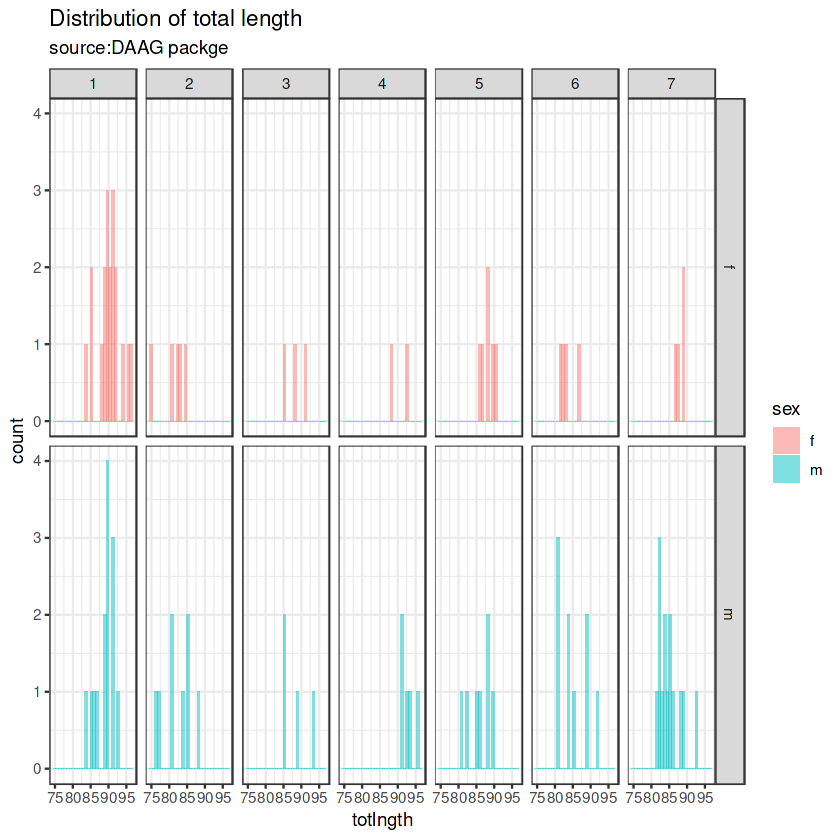

In [19]:
#Histogram + facet grid
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_grid(vars(sex),vars(site)) +
theme_bw()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


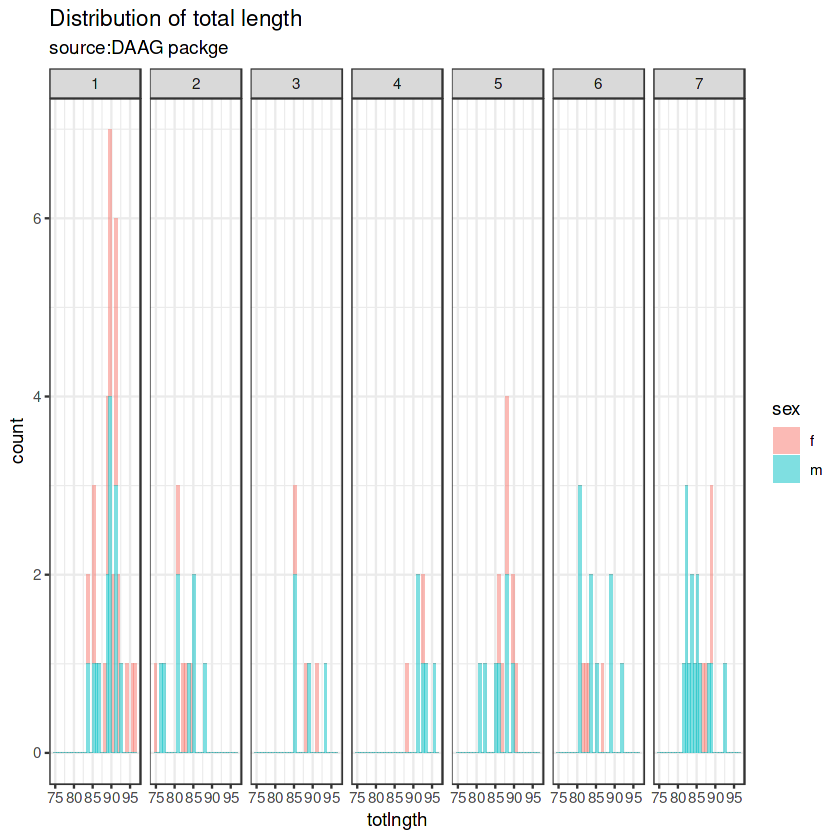

In [20]:
#Histogram + facet grid + col
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_grid(col = vars(site)) +
theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


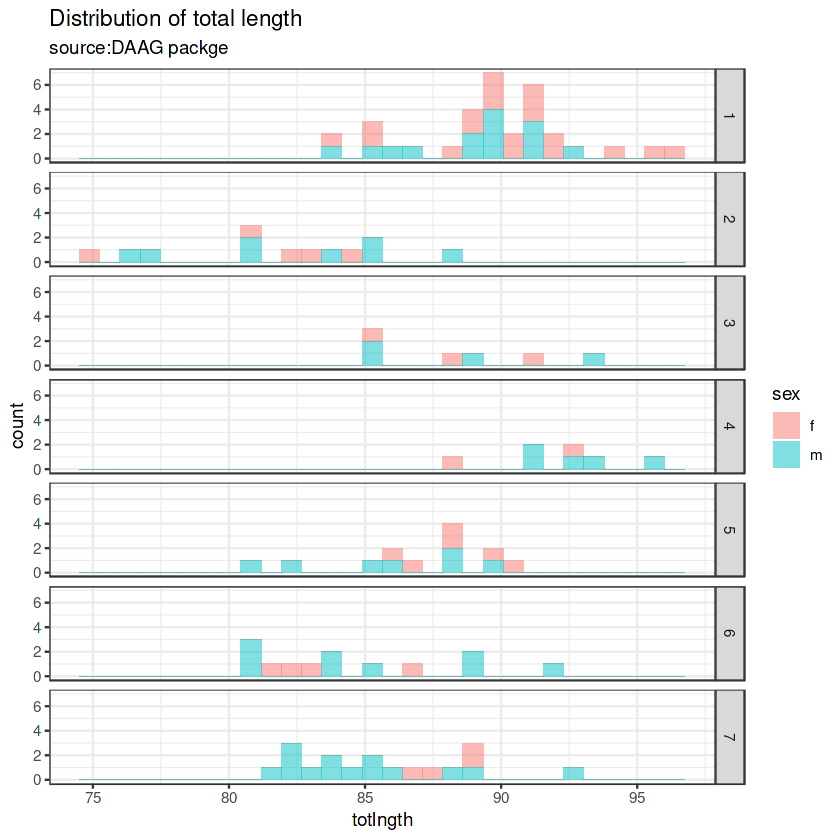

In [21]:
#Histogram + facet grid + row
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_grid(row = vars(site)) +
theme_bw()

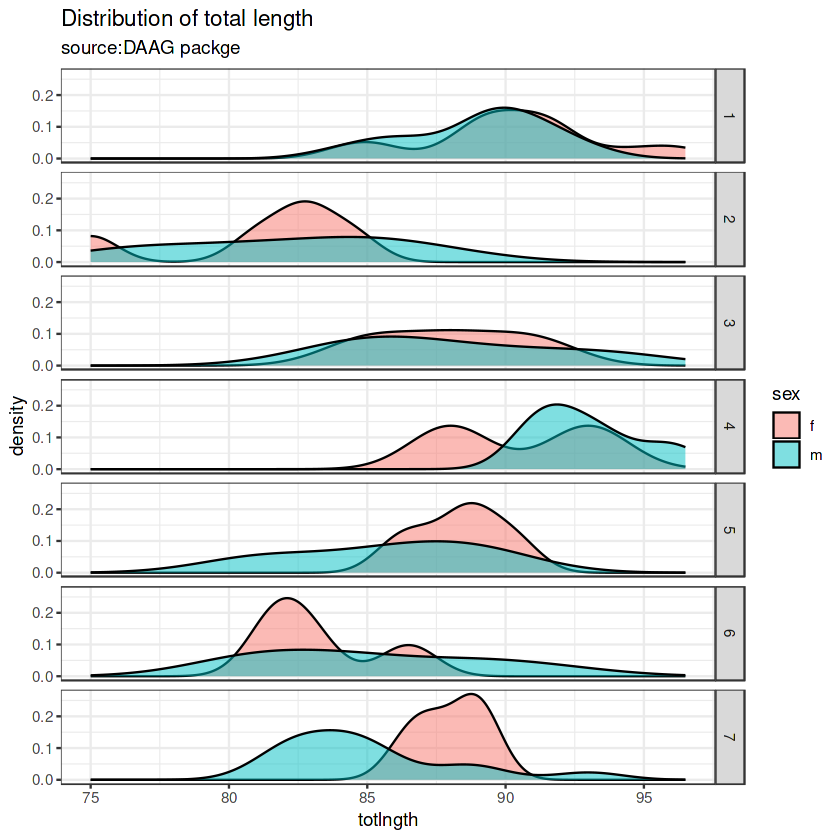

In [22]:
#Density + facet grid + row
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_density(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_grid(row = vars(site)) +
theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


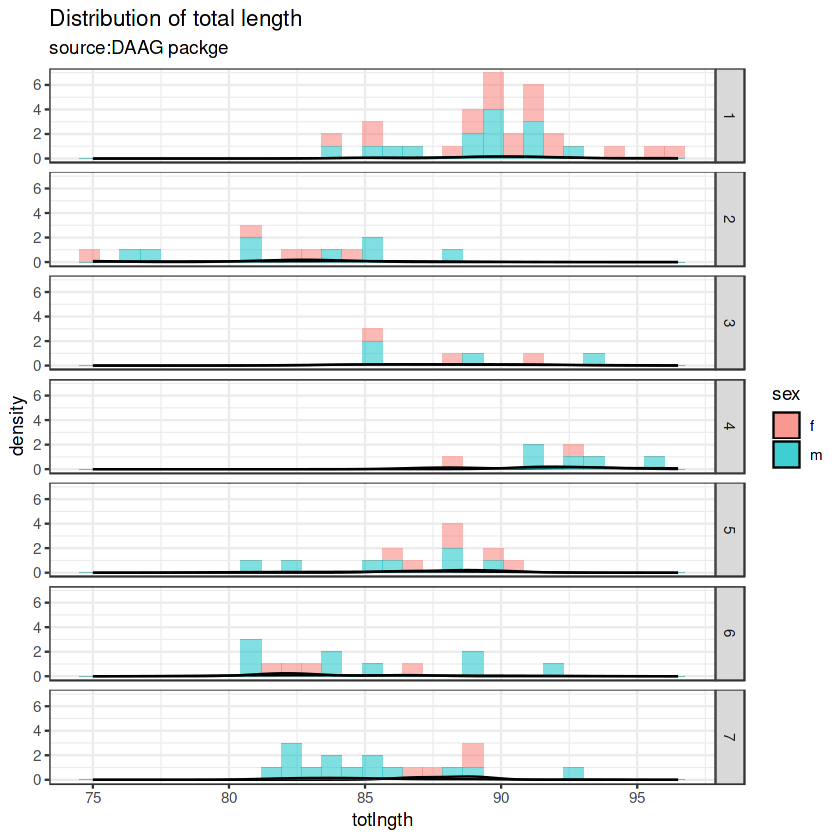

In [23]:
#Density + histogram
possum %>% ggplot(aes(x=totlngth,fill = sex)) +
geom_histogram(alpha = 0.5)+
geom_density(alpha = 0.5)+
ggtitle('Distribution of total length','source:DAAG packge')+
facet_grid(row = vars(site)) +
theme_bw()

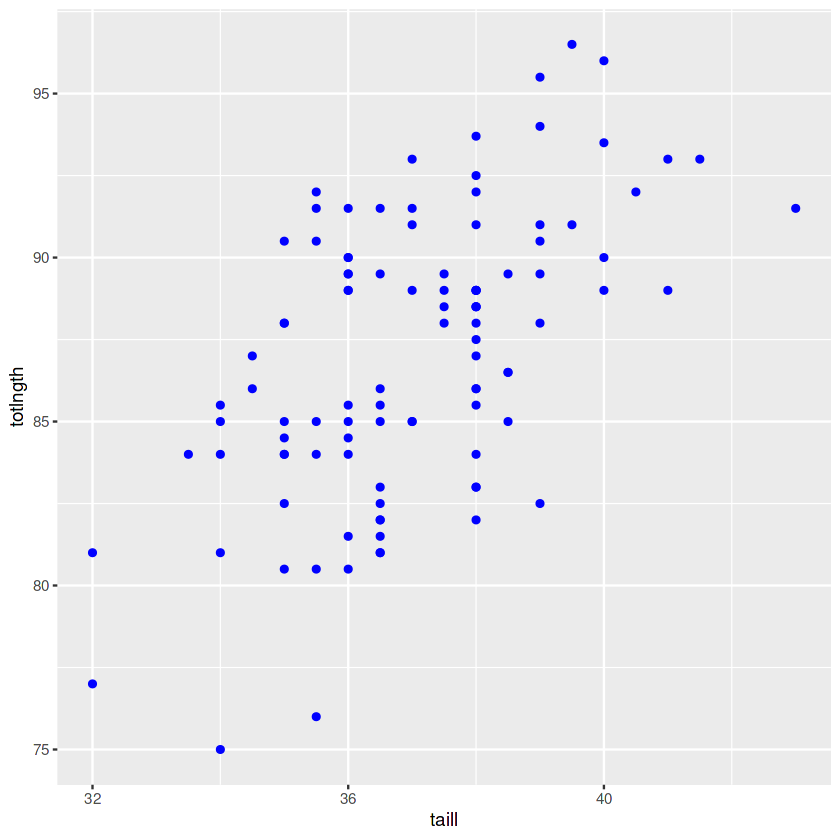

In [24]:
#Scatter plot
possum %>% ggplot(aes(x = taill,y = totlngth)) + 
geom_point(color = 'blue')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


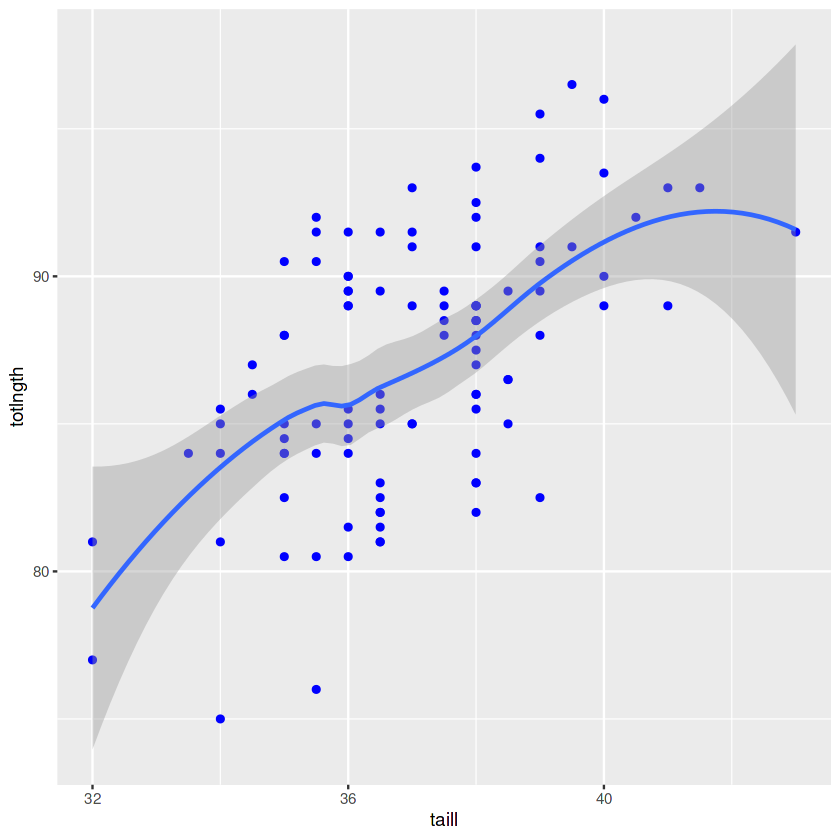

In [25]:
#Scatter plot
possum %>% ggplot(aes(x = taill,y = totlngth)) + 
geom_point(color = 'blue') +
geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


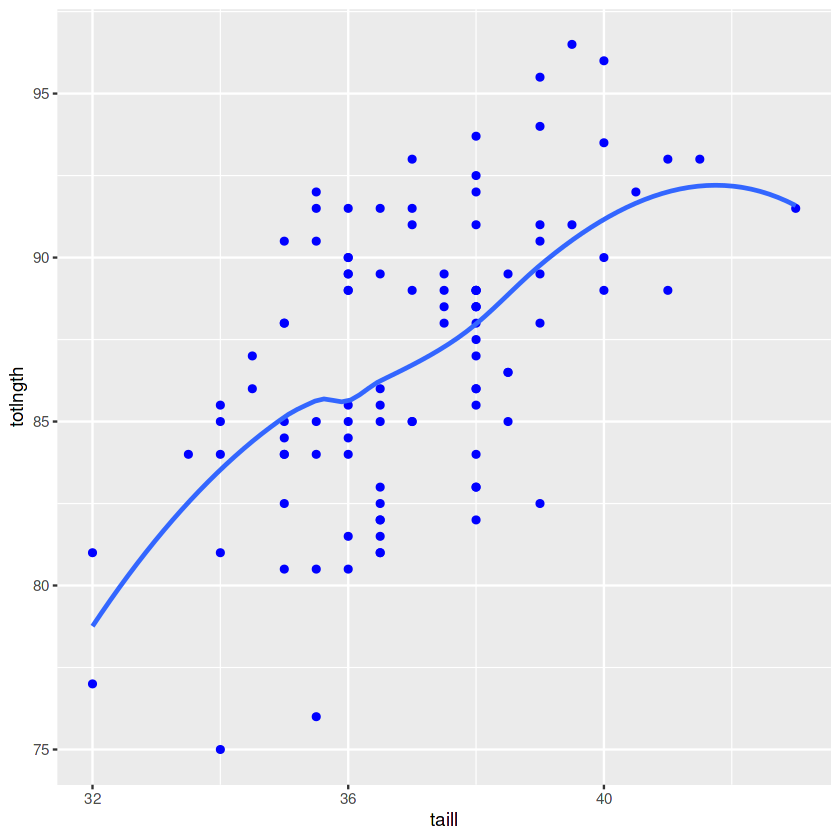

In [26]:
#Scatter plot
possum %>% ggplot(aes(x = taill,y = totlngth)) + 
geom_point(color = 'blue') +
geom_smooth(se = 0)

`geom_smooth()` using formula = 'y ~ x'


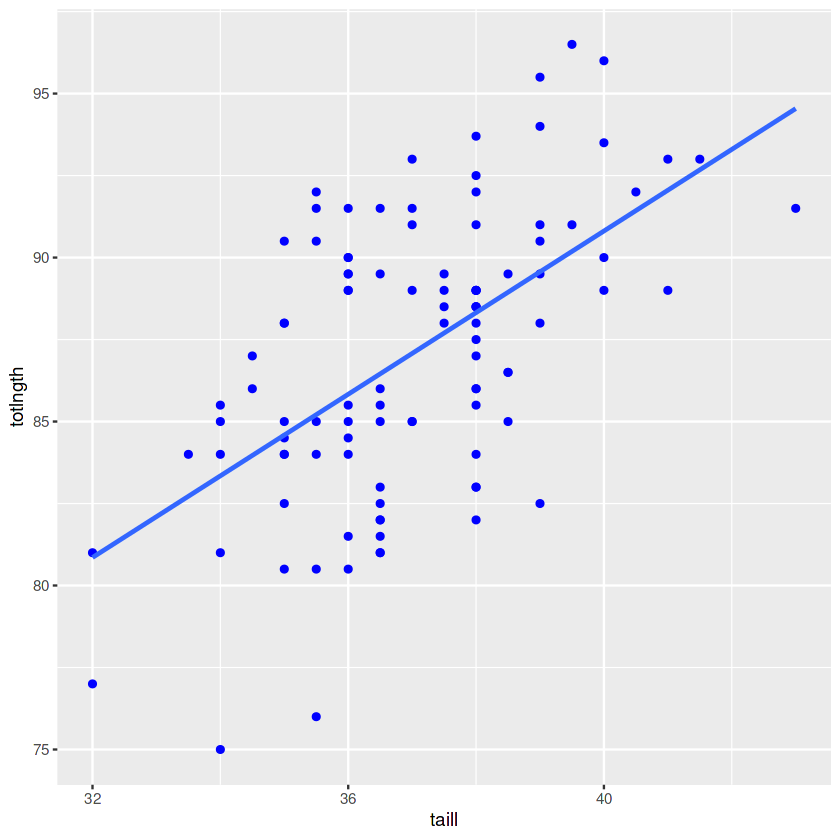

In [27]:
#Scatter plot
possum %>% ggplot(aes(x = taill,y = totlngth)) + 
geom_point(color = 'blue') +
geom_smooth(se = 0,method = 'lm') # lm stands linear model

`geom_smooth()` using formula = 'y ~ x'


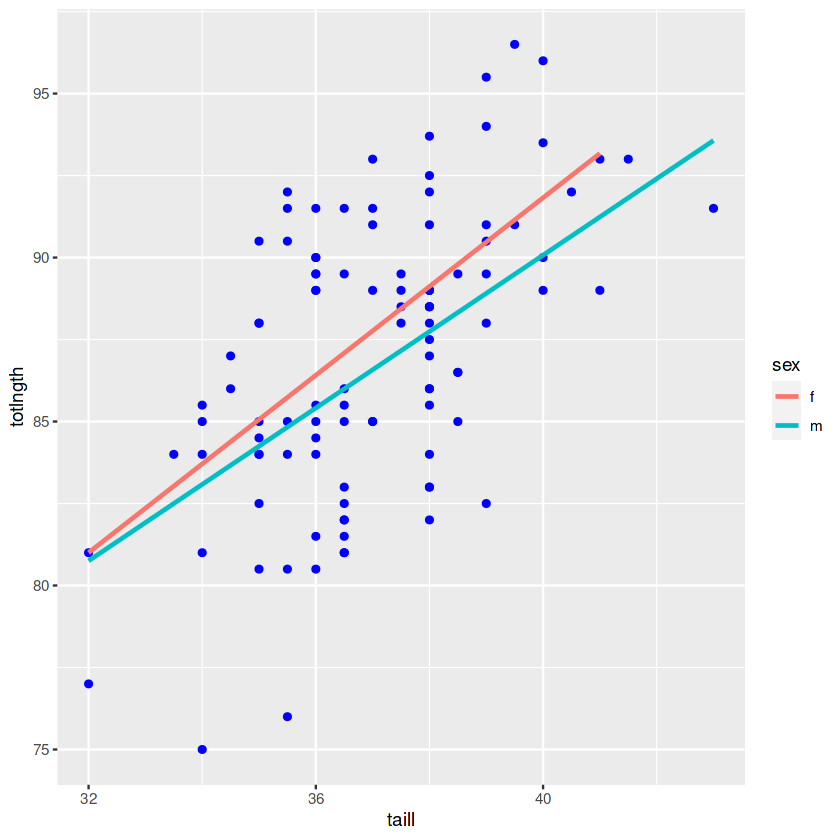

In [28]:
#Scatter plot with 2 trend lines
possum %>% ggplot(aes(x = taill,y = totlngth,col = sex)) + 
geom_point(color = 'blue') +
geom_smooth(se = 0,method = 'lm') # lm stands linear model

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


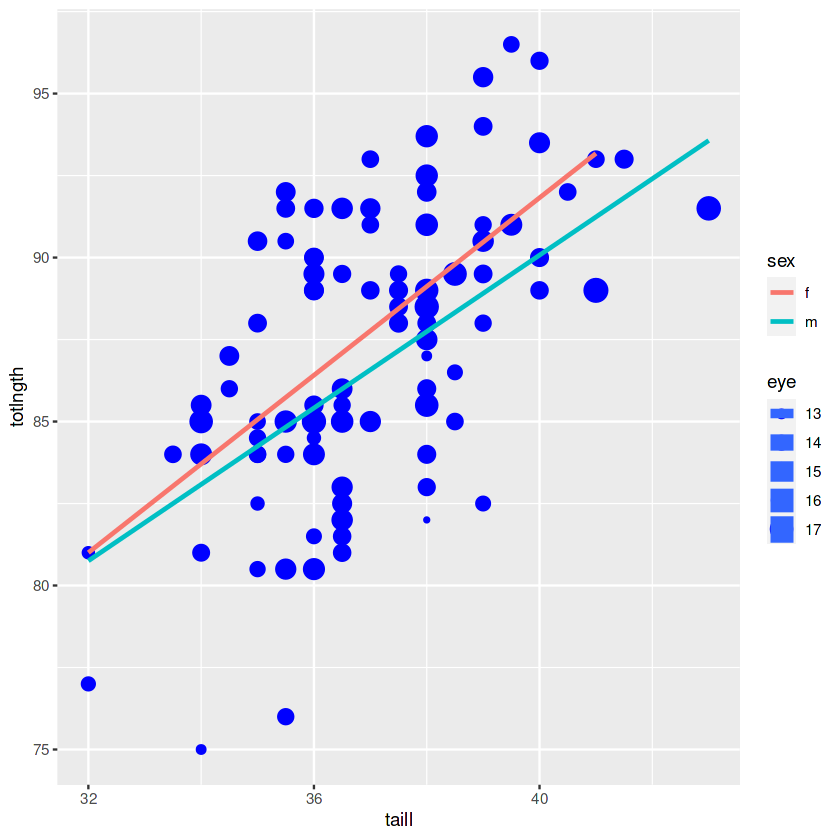

In [29]:
#Scatter plot with 2 trend lines
possum %>% ggplot(aes(x = taill,y = totlngth,col = sex,size = eye )) + 
geom_point(color = 'blue') +
geom_smooth(se = 0,method = 'lm') # lm stands linear model

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


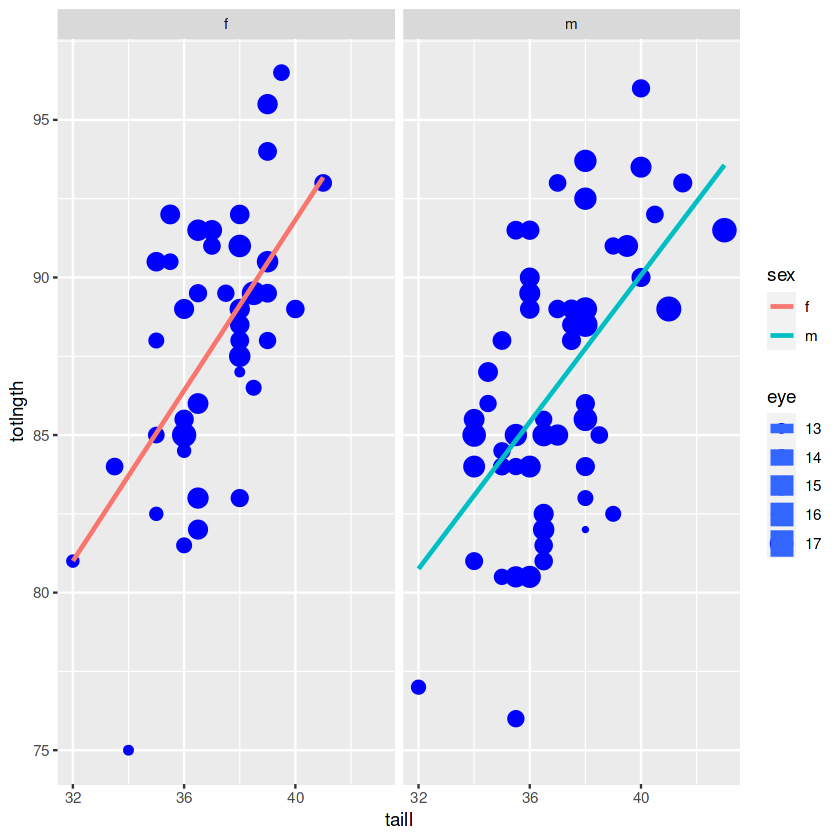

In [30]:
#Scatter plot with 2 trend lines
possum %>% ggplot(aes(x = taill,y = totlngth,col = sex,size = eye )) + 
geom_point(color = 'blue') +
geom_smooth(se = 0,method = 'lm') +     # lm stands linear model
facet_wrap (~ sex)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: size


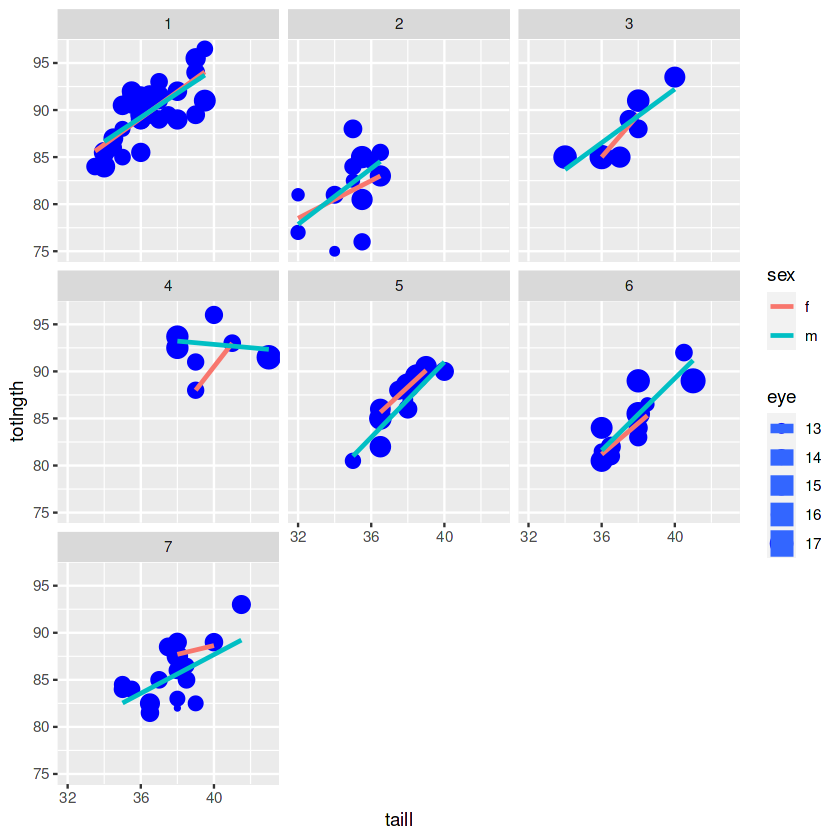

In [31]:
#Scatter plot with 2 trend lines
possum %>% ggplot(aes(x = taill,y = totlngth,col = sex,size = eye )) + 
geom_point(color = 'blue') +
geom_smooth(se = 0,method = 'lm') +     # lm stands linear model
facet_wrap (~ site)

In [32]:
?Animals

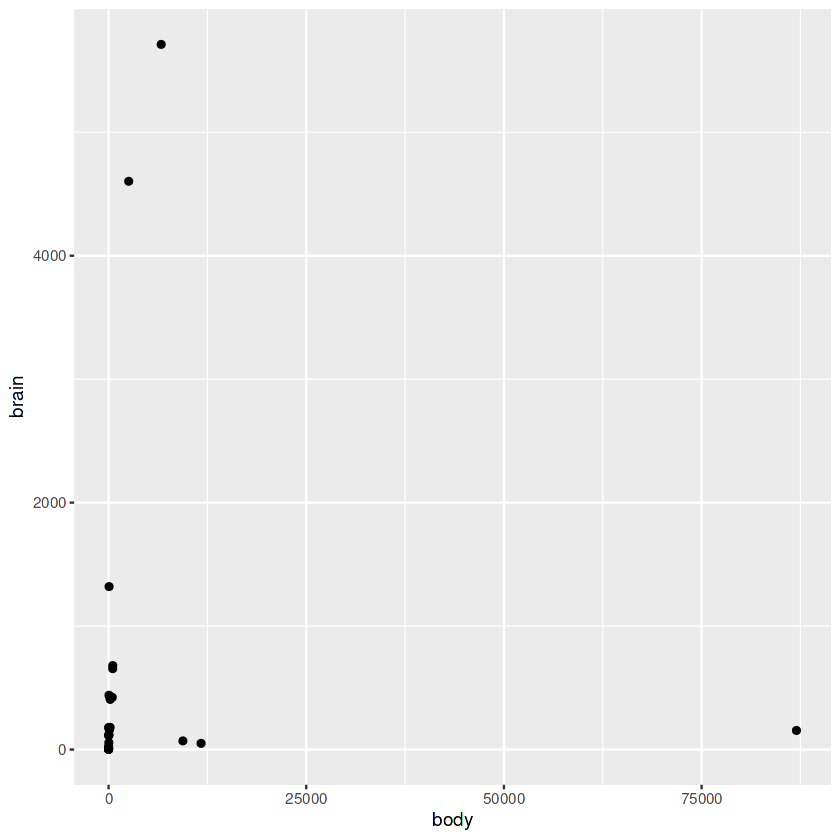

In [33]:
#Scatterplot
ggplot(Animals,aes(x = body,y=brain)) +
geom_point()

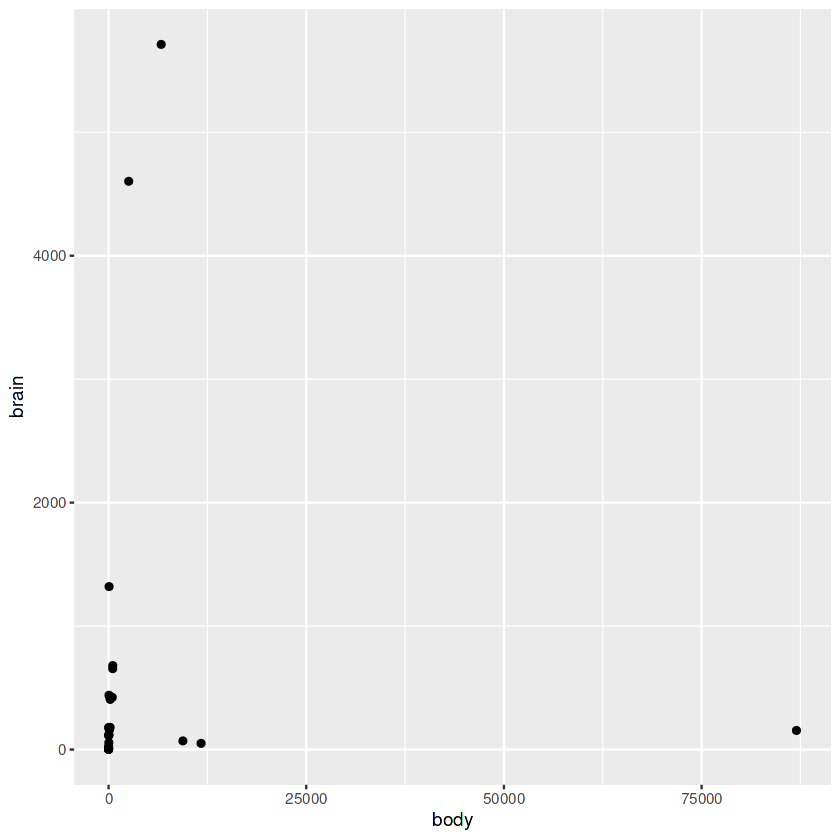

In [34]:
#Scatterplot
ggplot(Animals,aes(x = body,y=brain)) +
geom_point()

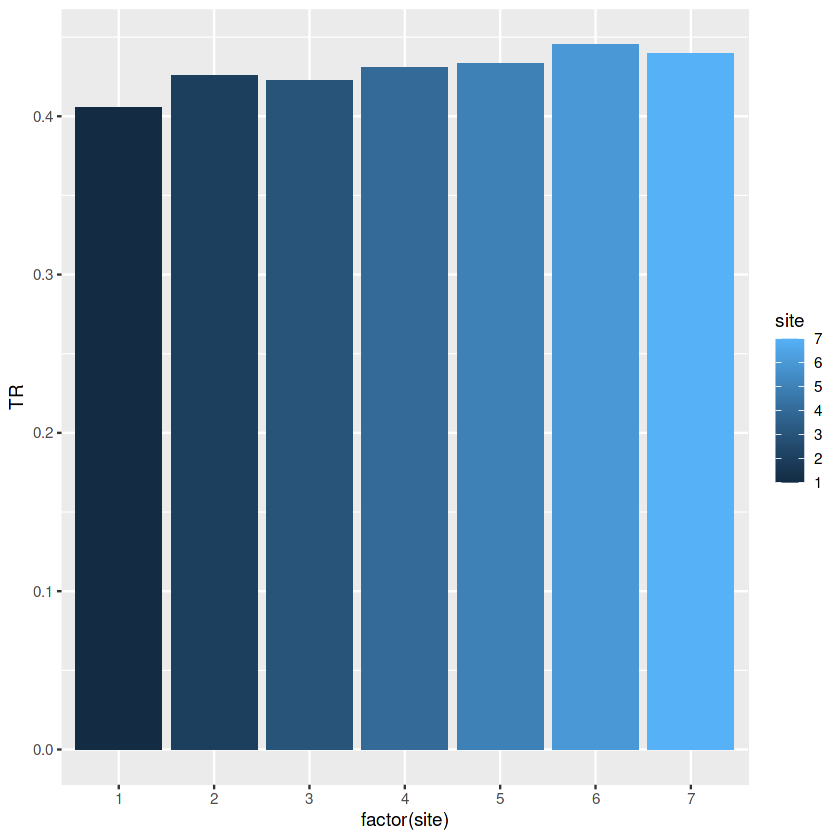

In [35]:
#Barplot
new <- possum %>%
group_by(site) %>%
summarize(TR = sum(taill)/sum(totlngth),
         count=n()) %>%
arrange(desc(TR)) 

ggplot(new,aes(x =factor(site),y =TR,fill = site)) +
geom_col()

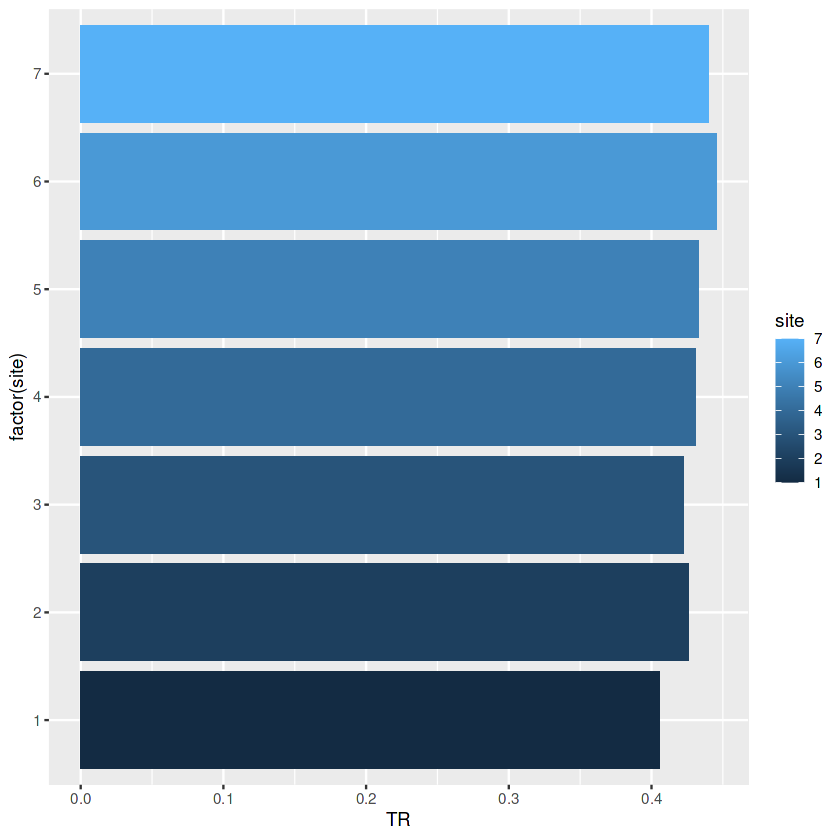

In [36]:
#Barplot
new <- possum %>%
group_by(site) %>%
summarize(TR = sum(taill)/sum(totlngth),
         count=n()) %>%
arrange(desc(TR)) 

ggplot(new,aes(x =factor(site),y =TR,fill = site)) +
geom_col() +
coord_flip()

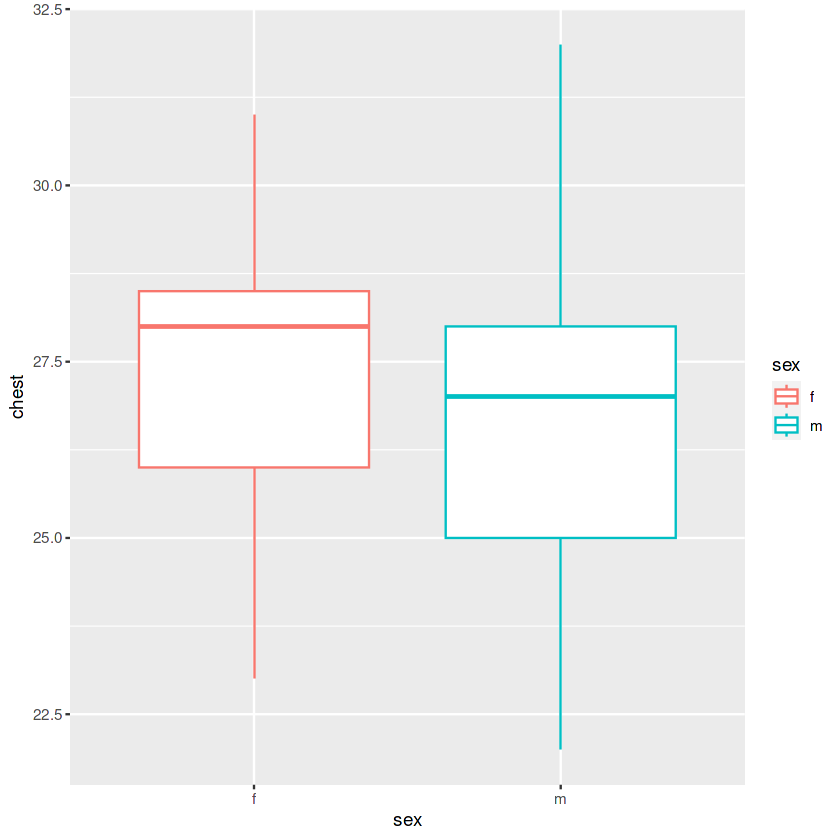

In [37]:
#Boxplot
possum %>% ggplot(aes(x= sex,y= chest,col = sex)) +
geom_boxplot()

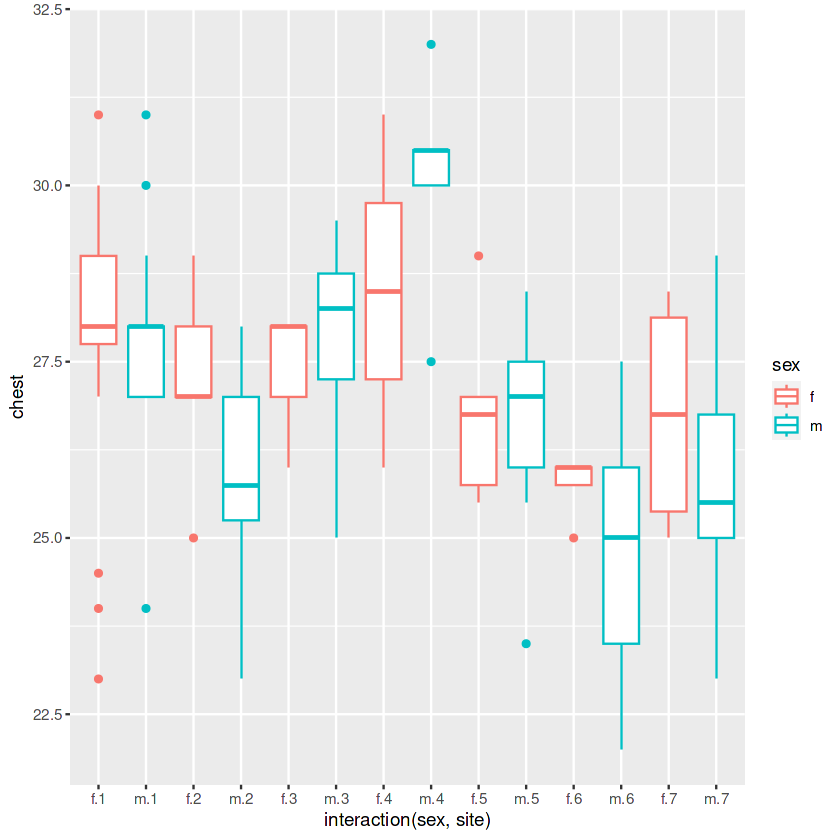

In [38]:
##Boxplot interaction
possum %>% ggplot(aes(x= interaction(sex,site),y= chest,col = sex)) +
geom_boxplot()

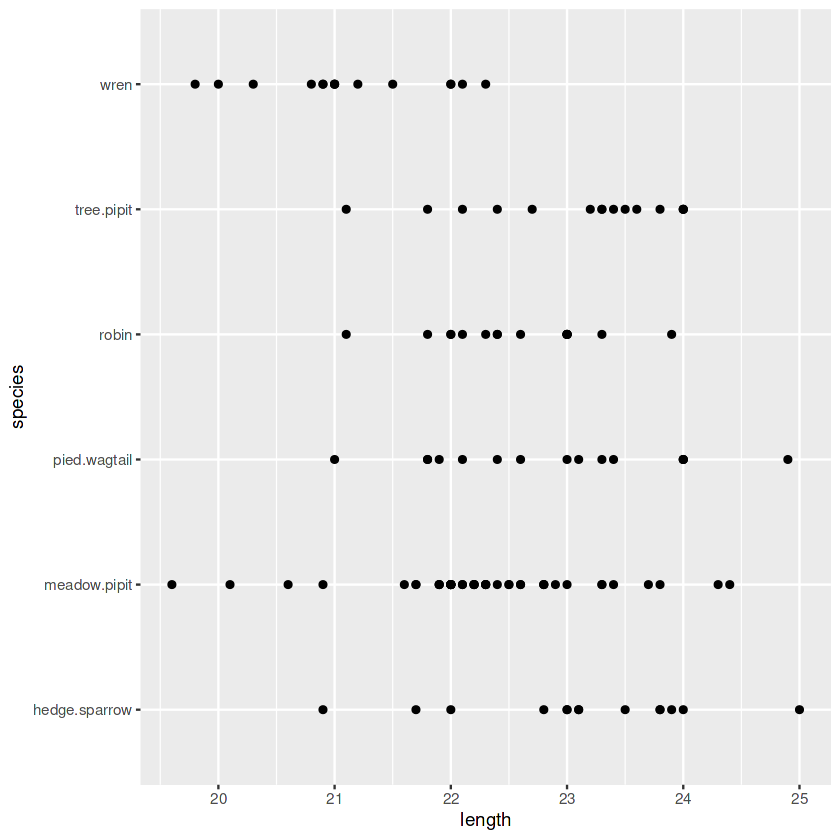

In [39]:
#plot in 2column
#cuckoos dataset
ggplot(cuckoos,aes(x = length,y = species)) +
geom_point()

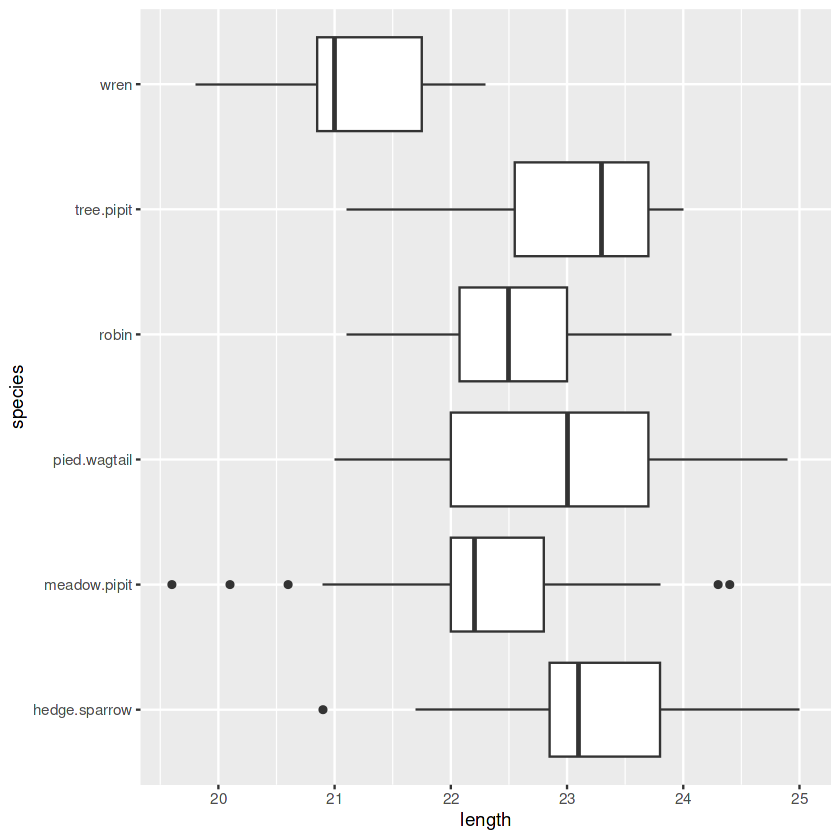

In [40]:
ggplot(cuckoos,aes(x = length,y = species)) +
geom_boxplot()